In [1]:
if 'google.colab' in str(get_ipython()):
    !git clone https://github.com/lukewood/rl-routing && cd rl-routing && pip install .

In [2]:
import networkx as nx

graph=nx.random_internet_as_graph(10)
pos = nx.spring_layout(graph)
nx.set_node_attributes(graph, pos, "pos")

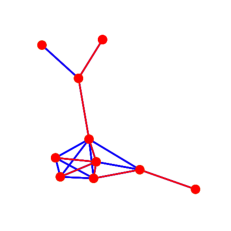

Wires:
 [[0.1954023  0.         0.         0.         0.11494253 0.
  0.         0.         0.         0.        ]
 [0.         0.49425287 0.         0.         0.16091954 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.36781609 0.         0.27586207 0.
  0.04597701 0.         0.         0.        ]
 [0.         0.         0.         0.33333333 0.28735632 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.12643678 0.         0.3908046  0.
  0.         0.         0.         0.        ]
 [0.06896552 0.         0.         0.         0.         0.17241379
  0.         0.         0.         0.        ]
 [0.         0.         0.02298851 0.         0.         0.
  0.40229885 0.         0.         0.01149425]
 [0.         0.         0.         0.         0.         0.
  0.         0.05747126 0.         0.        ]
 [0.         0.         0.         0.         0.         0.18390805
  0.         0.         0.22988506 0.        ]
 [0.         

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import time
import rl_routing
from IPython.display import clear_output

def draw_output(img):
    plt.axis("off")
    plt.imshow(img)
    plt.show()

env = rl_routing.NetworkEnv(graph=graph, fig=Figure(figsize=(6, 6)))
i = 100
env.create_packets(n=i)

for _ in range(1000):
    observation, reward, done, _ = env.step()
    img = env.render()
    draw_output(img)
    print("Adjacency Matrix\n", observation[0])
    print("Wires:\n",observation[1])
    print("Nodes:\n",observation[2])
    clear_output(wait=True)
    time.sleep(10000/1000)
    if done:
        env.create_packets(n=i)
        i+=1
draw_output(env.render())
